# TOPICS [5TH JUNE 2025]:

- Epochs.
- Batch Size.
- Iteration.
- Learning Rate.
- Parameters vs Hyperparameters

---

## EPOCHS:

- When an entire training set is passed through algorithm [both forward & backward -> for NNs] then it is said to be a 1 epoch.

- e.g.: 
Training samples length -> 1000 [rows / training data samples]
if EPOCHS = 20 -> Then algorithm will be processing each one of the sample from that Training samples 20 times...

## BATCH & BATCH SIZE: 

- The training set/data is divided into small batches (chunks) to avoid the storage space limitations and other limitations of a computer system.
- *HYPERPARAMETER Batch Size* is basically the number of samples per batch/chunk.
- This refers to the subset of the training data that is processed together (**1 forward pass & 1 backward pass** of NN).

e.g.:
- Training samples length -> 1000 samples
    - If EPOCH = 5: all 1000 samples will be processed 5 times.
    - There will be total 5 iterations here...

- let BATCH_SIZE = 500:
    - Here 500 samples will be processed together and then parameters are updated (i.e. weights & bias and all)
    - batch_1 : first 500 samples [processing] -> iteration 1
    - batch_2 : second 500 samples [processing] -> iteration 2

    - This batch_1 and batch_2 are processed at every epochs. That means there are total 2 iterations in 1 epoch.

## Iterations:

- As seen in above example, an iteration is counted when a single batch is processed.
- At every iteration the parameters are updated [Ws & Bs]
- In NN at every iteration following things happen:
    - **Forward Propagation:** Input data passed through n/w to generate the predictions & loss is calculated [here we use activation functions to find non-linearity].
    - **Backward Propagation:** Calculated loss are used to calculate the gradient & parameters are updated to reduce the loss [we here use optimizers]

```
No. of iterations (per epoch) = len(X_train) / batch_size
```

## Learning Rate:

- In any model (especially deep learning one), during the training process. Model's parameters are updated frequently in order to minimize the loss. So learning rate basically controls how much to change the model's parameters wrt loss calculated. *(we have already seen this during study of optimizers)*

- lr is basically the step size the model takes towards minimizing the loss.

- LOW LR: model updates its parameters too slowly and take too long to reach convergence.
- HIGH LR: model updates its parameters too frequently and leads to overshooting.
- Optimal LR: not too low not too high lr.

Best Practices to determine the Learning Rate: 
- Starting with low lr, and gradually increasing it in multicaptive way [0.001, 0.01, 0.1] - along with monitoring the loss.
- Using *Optimizers* that automatically adjust the learning rate like **Adam** or **RMSProp**

```
w(i) = w(i-1) + lr * g(loss) 

w -> weights
lr -> learning rate
g(loss) -> gradient of loss function [partial derivative - to find the slope]
```

## Parameters & Hyperparameters:

### Parameters:

- These are internal variables of the model learned/tuned during model training from the training data.
- Paremeters are initialized randomly initially and updated via gradient descent during training. 
- Stored in model checkpoints when saved (e.g.: SafeTensors file for LLMs consists of trained params)

e.g.:
- In Linear Regression: thetas are parameter (slopes and intercept)
- In NN: Weights & bias (at each layer) are parameters
- In LLM (Transformer based networks: BERT and all): Attention weights, feed forward layer weights, embedding matrices


### Hyperparameters:

- Hyperparameters are externel settings determined by us or auto-tuners which are set before training process start. So hyperparameters are not learned during the training.

- Setting up right parameters for the model leads to the best results, it can be done manuallly and there are various methods to perform the hyperparam. tuning like **Grid Search CV, Bayesian Optimization, Random Search**, etc


e.g. of hyperparams:
- Epochs
- Batch Size
- Learning rate
- Dropout rate
- No. of layers (in dl)



In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles
%matplotlib inline

In [37]:
# Dataset generation:
X, y = make_gaussian_quantiles(n_samples=1200,n_features=3, n_classes=2, random_state=50)

# splitting the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1666666, random_state=50)
X_train.shape

(1000, 3)

In [41]:
# Hyperparameters

EPOCHS = 5
BATCH_SIZE = 500

In [43]:
print(f"""
EPOCHS: {EPOCHS}
Iterations per Epoch: {int(len(X_train) / BATCH_SIZE)} [update params]
""")
for epoch in range(EPOCHS):
    # This is where entire training sample should be passed...
    # Here we passed every samples as inputs but don't update the parameters...
    print(f"EPOCH COUNT: {epoch}")
    
    for i in range(0, len(X_train), BATCH_SIZE): #This can be considered as batches
        print(f"> batch-{'1' if i == 0 else '2'}")
        # Here we update the parameters
        # Weights and Bias
        
    print(f"-"*30)
        
    


EPOCHS: 5
Iterations per Epoch: 2 [update params]

EPOCH COUNT: 0
> batch-1
> batch-2
------------------------------
EPOCH COUNT: 1
> batch-1
> batch-2
------------------------------
EPOCH COUNT: 2
> batch-1
> batch-2
------------------------------
EPOCH COUNT: 3
> batch-1
> batch-2
------------------------------
EPOCH COUNT: 4
> batch-1
> batch-2
------------------------------


Text(0.5, 1.0, 'Generated classification datasets')

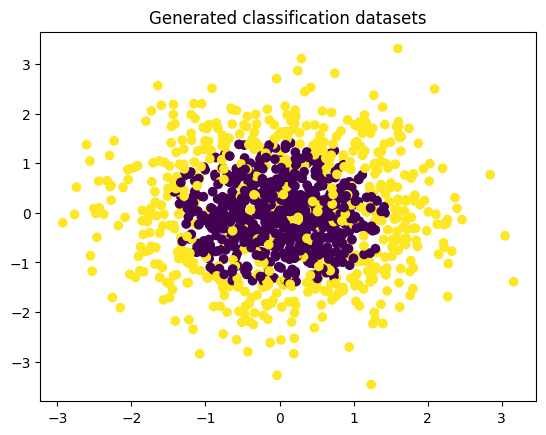

In [44]:
# Generated Data Samples Plotting
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Generated classification datasets")

---
By Kirtan Ghelani @SculptSoft